In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [122]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline

In [37]:
seed = 42
np.random.seed(seed)

In [ ]:
drop_cols = ["time_stamp",
             "Machine1.Zone1Temperature.C.Actual", "Machine2.Zone1Temperature.C.Actual", "Machine3.Zone1Temperature.C.Actual",
             "Machine1.Zone2Temperature.C.Actual", "Machine2.Zone2Temperature.C.Actual", "Machine3.Zone2Temperature.C.Actual",
             "Machine2.ExitZoneTemperature.C.Actual", "Machine3.ExitZoneTemperature.C.Actual",
             "Machine2.MotorAmperage.U.Actual", "Machine2.MotorRPM.C.Actual",
             "FirstStage.CombinerOperation.Temperature3.C.Actual"]

In [38]:
df0_indexed = pd.read_csv("../Data/df0_indexed.csv")

X0, y0 = df0_indexed.iloc[:, :42], df0_indexed.iloc[:, 42:44]

X0_reduced = X0.copy()
X0_reduced.drop(drop_cols, axis=1, inplace=True)

y0_Actual = y0.iloc[:, 0]

In [39]:
X0_reduced.shape

(13927, 30)

In [112]:
def base_model():
	# create model
    model = Sequential()
    model.add(Dense(30, input_dim=30, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(128, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
	# Compile model
    model.compile(loss='mse', optimizer='adam')
    return model

In [113]:
estimators = []
estimators.append(('robust', RobustScaler()))
estimators.append(('kerasReg', KerasRegressor(build_fn=base_model, epochs=20, batch_size=10, verbose=1)))

In [114]:
pipe = Pipeline(estimators)

In [115]:
kfold = KFold(n_splits=5, shuffle=True, random_state=seed)

In [124]:
X0_train, X0_test, y0_train, y0_test = train_test_split(X0_reduced, y0_Actual, test_size=0.2, random_state=seed)

In [136]:
cross_val_score(pipe, X0_train, y0_train, cv=kfold, n_jobs=1)

Epoch 1/20
892/892 [==============================] - 1s 758us/step - loss: 12.3706
Epoch 2/20
892/892 [==============================] - 1s 761us/step - loss: 1.1014
Epoch 3/20
892/892 [==============================] - 1s 762us/step - loss: 0.2566
Epoch 4/20
892/892 [==============================] - 1s 757us/step - loss: 0.0404
Epoch 5/20
892/892 [==============================] - 1s 740us/step - loss: 0.0122
Epoch 6/20
892/892 [==============================] - 1s 757us/step - loss: 0.0102
Epoch 7/20
892/892 [==============================] - 1s 765us/step - loss: 0.0104
Epoch 8/20
892/892 [==============================] - 1s 786us/step - loss: 0.0094
Epoch 9/20
892/892 [==============================] - 1s 762us/step - loss: 0.0096
Epoch 10/20
892/892 [==============================] - 1s 795us/step - loss: 0.0084
Epoch 11/20
892/892 [==============================] - 1s 765us/step - loss: 0.0081
Epoch 12/20
892/892 [==============================] - 1s 824us/step - loss: 0.0079


892/892 [==============================] - 1s 802us/step - loss: 0.0070
Epoch 16/20
892/892 [==============================] - 1s 868us/step - loss: 0.0066
Epoch 17/20
892/892 [==============================] - 1s 766us/step - loss: 0.0071
Epoch 18/20
892/892 [==============================] - 1s 758us/step - loss: 0.0068
Epoch 19/20
892/892 [==============================] - 1s 756us/step - loss: 0.0068
Epoch 20/20
223/223 [==============================] - 0s 585us/step - loss: 0.0077


array([-0.00625975, -0.00586612, -0.00634911, -0.00558548, -0.00769738])

In [125]:
pipe.fit(X0_train, y0_train)

Epoch 1/20
1115/1115 [==============================] - 1s 995us/step - loss: 9.8243
Epoch 2/20
1115/1115 [==============================] - 1s 817us/step - loss: 0.6120
Epoch 3/20
1115/1115 [==============================] - 1s 764us/step - loss: 0.0713
Epoch 4/20
1115/1115 [==============================] - 1s 763us/step - loss: 0.0148
Epoch 5/20
1115/1115 [==============================] - 1s 771us/step - loss: 0.0109
Epoch 6/20
1115/1115 [==============================] - 1s 761us/step - loss: 0.0096
Epoch 7/20
1115/1115 [==============================] - 1s 801us/step - loss: 0.0089
Epoch 8/20
1115/1115 [==============================] - 1s 799us/step - loss: 0.0088
Epoch 9/20
1115/1115 [==============================] - 1s 772us/step - loss: 0.0075
Epoch 10/20
1115/1115 [==============================] - 1s 822us/step - loss: 0.0072
Epoch 11/20
1115/1115 [==============================] - 1s 849us/step - loss: 0.0071
Epoch 12/20
1115/1115 [==============================] - 1s 770

Pipeline(steps=[('robust', RobustScaler()),
                ('kerasReg',
                 <tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x00000239971BA7B8>)])

In [126]:
y0_pred = pipe.predict(X0_test)

279/279 [==============================] - 0s 527us/step


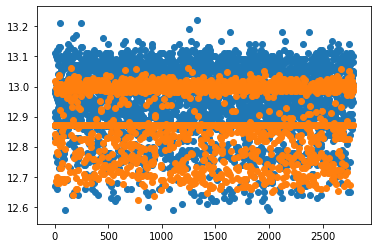

In [131]:
plt.scatter(np.arange(len(X0_test)), y0_test)
plt.scatter(np.arange(len(X0_test)), y0_pred)

In [133]:
pipe.score(X0_test, y0_test)

279/279 [==============================] - 0s 609us/step - loss: 0.0088


-0.00882023572921753

1393/1393 [==============================] - 1s 519us/step


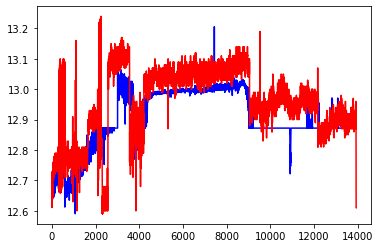

In [132]:
plt.plot(pipe.predict(X0_reduced), "b")
plt.plot(y0_Actual, "r")